# Preprocessing: Data Scaling

In this lesson we will discuss different ways to scale our data, that is, different ways to change the range of a feature or features.

## Background and Context

Scaling is the process by which we normalize the numeric range of the atttributes of our data.
There are several ways to do this, but as an example, we might adjust the scale of our data such that the highest value is 1 and the smallest value is 0 (this is referred to as min-max scaling).

### Why Scale Data?

In general, working with the data in its original units is preferred. However, there are a number of occasions where we might wish to work with scaled data instead:

- We might wish to visualize the combination of 2 variables with different scales.
- Some statistical tests assume normality of the data. We could apply a **non-linear** scaler to a non-normally distributed feature so that this assumption is met.
- If two features have very different scales the feature with the larger units will have a larger impact on some model types (anywhere distance is measured).
- Sometimes scaling the data can provide a better interpretation than the original units. Times when a log scale is helpful are an example of this.
- If we wish to combine features with different units it could be helpful to first scale both features to the same units.

### When do we scale data?

In terms of a project lifecycle, data scaling is typically performed between the initial data exploration and feature engineering.
Scaling data is an activity we will do in the prepare phase of the data science pipeline.
We might wish to set up multiple datasets, one with scaled units and one without.
Another option is to add additional columns to our original dataset with the scaled features.

It is important that data scaling happens **after** data splitting. We don't want to leak information from our test/validate splits by using those to calculate parameters for scaling.

### How do we scale the data?

Data is scaled with either a **linear** or **non-linear** scaling method.
A scaling method is typically a mathematical formula that can be used to transform a data point from the original dataset into a datapoint in the scaled dataset.
A common convention is to notate the transformed data as $x'$ and the original as $x$.

Note that features are scaled independently. That is, the way we scale one feature does not impact the way we scale another feature. Put another way, imagine we have two features we wish to scale: x1 and x2. The mean of x1 plays no role in the way we scale x2.

Most scaling methods involve the calculation of a parameter from the dataset, for example the maximum data point, or the mean of the data.
When calculating these parameters, it is important that they are derived from the training dataset.
Once we know these parameters, we can apply the same scaling to every data point in the validate and test splits.

Most of the scaling methods we'll discuss have implementations in the `sklearn.preprocessing` module. The objects there are used like many other sklearn objects: first by fitting and then by transforming. A fit object can be used to either scale an unscaled feature or to transform a scaled feature back to the original units.

### Linear vs Non-linear Scalers

The types of scaling we can perform on our data fall into two categories: **linear** and **non-linear**. In a linear scaling operation there is a linear correspondance between the original and the scaled value. A linear scaling operation maintains the "shape" of the distribution data and the space between data points is preserved. A non-linear scaling operation changes the shape of the data, and the distance between the points is *not* preserved.

Usually we will use a linear scaler, but non-linear scalers can be useful when changing the shape of the data is desireable, for example, when we wish to use a statistical test that assumes normality, but our data is not normally distributed.

## Setup

For the remainder of this lesson we will demonstrate how to scale our data with various methods and what the results of scaling look like.

Here is a histogram of the dataset we will be working with.


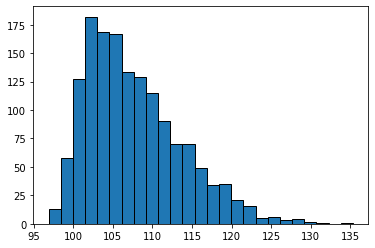

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

np.random.seed(123)

x = stats.skewnorm(7).rvs(1500) * 10 + 100
x = x.reshape(-1, 1)

plt.hist(x, bins=25,ec='black')
print('Here is a histogram of the dataset we will be working with.')

In [2]:
x_train_and_validate, x_test = train_test_split(x, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

## Min-Max Scaling

Min-max scaling is a linear scaling method that transforms our features such that the range is between 0 and 1.

$$ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $$

Text(0.5, 1.0, 'Scaled')

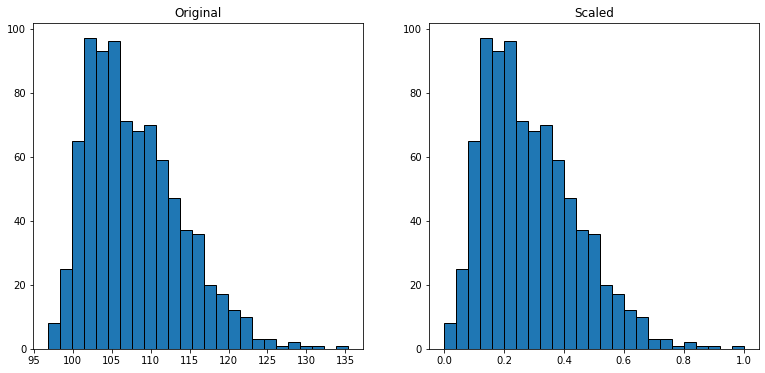

In [3]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

## Standard Scaler

**Standardization** is a linear transformation of our data such that is looks like the standard normal distribution. That is, it will have a mean of 0 and a standard deviation of 1.

$$ x' = \frac{x - \bar{x}}{\sigma_x} $$

Sometimes this is split into two operations:

- **scaling** is dividing each data point by the standard deviation. This causes the resulting dataset to have a standard deviation of 1.
- **centering** is subtracting the mean from each data point. This causes the resulting dataset to have a mean of 0.

Text(0.5, 1.0, 'Scaled')

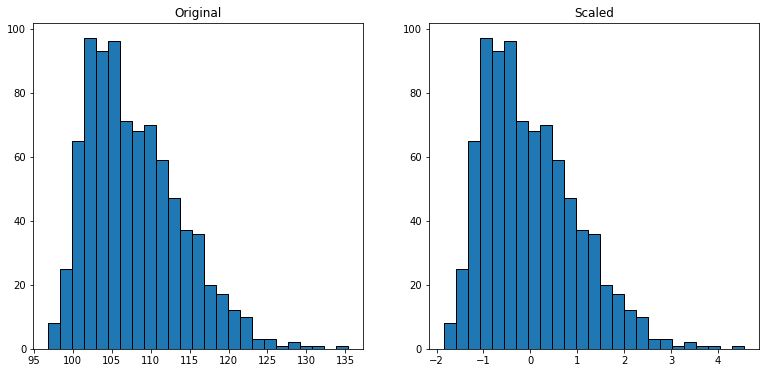

In [4]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

## RobustScaler

A robust scaler is another linear transformation that follows the same idea as the standard scaler but uses parameters that are more robust to outliers.

$$ x' = \frac{x - \text{med}(x)}{\text{IQR}_x} $$

Text(0.5, 1.0, 'Scaled')

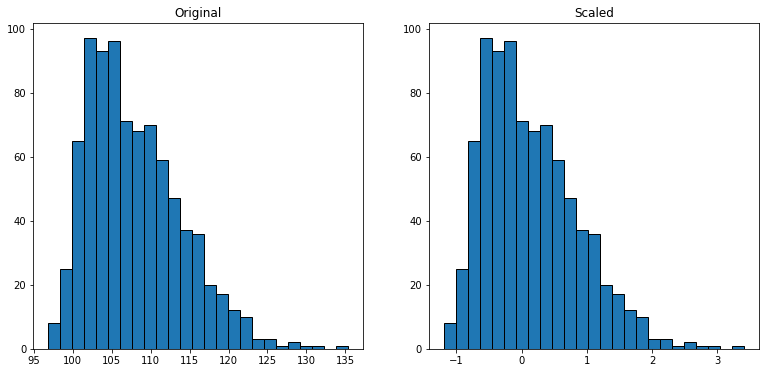

In [5]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

## Exercises

Do your work for these exercises in a jupyter notebook named `scaling`. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .
1. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?
1. Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.
1. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?
1. Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!